In [433]:
from random import randrange
def compute_dimension():
    dimension = randrange(100)
    return dimension
compute_dimension()

96

In [434]:
def compute_point():
    point = tuple(compute_dimension() for index in tuple(range(2)))
    return point
compute_point()

(28, 46)

In [435]:
from pandas import Series
points = Series(compute_point() for index in Series(range(100))).drop_duplicates().reset_index(drop = True)
points

0     (77, 72)
1     (11, 59)
2     (61, 70)
3     (29, 10)
4      (30, 0)
        ...   
95    (19, 89)
96    (39, 89)
97    (98, 51)
98    (60, 41)
99    (39, 35)
Length: 100, dtype: object

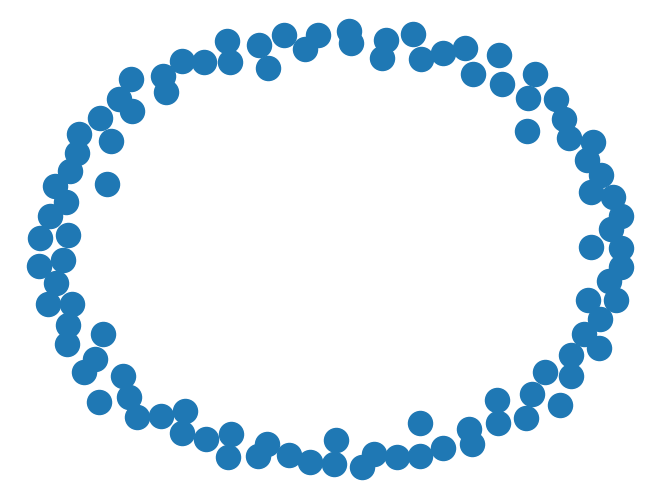

In [436]:
from networkx import Graph, draw
graph = Graph()
graph.add_nodes_from(points)
draw(graph)

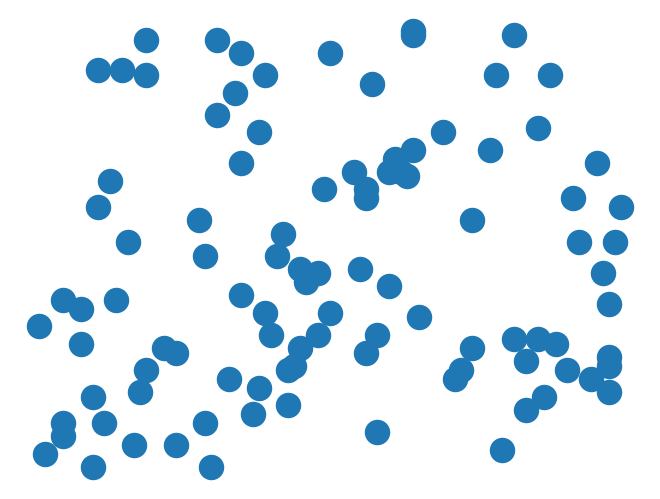

In [437]:
positions = {point : point for point in points}
draw(graph, positions)

In [438]:
from itertools import combinations
from pandas import DataFrame
candidate_edges = DataFrame(combinations(points, 2))
candidate_edges.columns = 'source', 'target'
candidate_edges

,source,target
0,"(77, 72)","(11, 59)"
1,"(77, 72)","(61, 70)"
2,"(77, 72)","(29, 10)"
3,"(77, 72)","(30, 0)"
4,"(77, 72)","(35, 39)"
...,...,...
4945,"(39, 89)","(60, 41)"
4946,"(39, 89)","(39, 35)"
4947,"(98, 51)","(60, 41)"
4948,"(98, 51)","(39, 35)"


In [439]:
from scipy.spatial.distance import euclidean
edge = candidate_edges.loc[0]
source = edge.source
target = edge.target
distance = euclidean(source, target)
distance

67.26812023536856

In [440]:
from scipy.spatial.distance import pdist
from pandas import concat
candidate_distances = Series(pdist(tuple(points)))
candidate_distances = concat((candidate_edges, candidate_distances), axis = 1)
candidate_distances.columns = 'source', 'target', 'distance'
candidate_distances

,source,target,distance
0,"(77, 72)","(11, 59)",67.268120
1,"(77, 72)","(61, 70)",16.124515
2,"(77, 72)","(29, 10)",78.409183
3,"(77, 72)","(30, 0)",85.982556
4,"(77, 72)","(35, 39)",53.413481
...,...,...,...
4945,"(39, 89)","(60, 41)",52.392748
4946,"(39, 89)","(39, 35)",54.000000
4947,"(98, 51)","(60, 41)",39.293765
4948,"(98, 51)","(39, 35)",61.131007


In [441]:
from networkx import k_edge_augmentation
index = candidate_edges.apply(tuple, 1)
avail = candidate_distances.distance
avail.index = index
avail = avail.to_dict()
edges = DataFrame(tuple(k_edge_augmentation(graph, 1, avail)))
edges.columns = 'source', 'target'
edges

,source,target
0,"(77, 72)","(69, 76)"
1,"(77, 72)","(85, 77)"
2,"(11, 59)","(13, 65)"
3,"(11, 59)","(16, 51)"
4,"(61, 70)","(62, 67)"
...,...,...
94,"(71, 20)","(72, 22)"
95,"(60, 67)","(56, 63)"
96,"(99, 59)","(98, 51)"
97,"(74, 27)","(72, 22)"


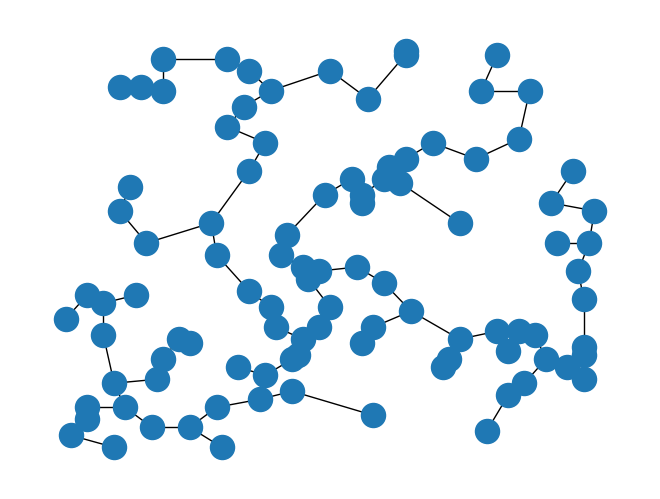

In [442]:
edges_tuples = edges.apply(tuple, 1)
graph.add_edges_from(edges_tuples)
draw(graph, positions)

In [443]:
from random import choice
def construct_frequent_point():
    frequent_point = choice(points)
    return frequent_point
construct_frequent_point()

(71, 20)

In [444]:
def compute_frequent_points():
    frequent_points = tuple(construct_frequent_point() for index in tuple(range(10)))
    return frequent_points
frequent_points = compute_frequent_points()
frequent_points

((39, 89),
 (1, 32),
 (18, 17),
 (62, 67),
 (34, 85),
 (38, 18),
 (29, 48),
 (35, 69),
 (16, 51),
 (35, 94))

In [445]:
phases = tuple(compute_frequent_points() for index in tuple(range(2)))
phases

(((48, 30),
  (77, 72),
  (50, 35),
  (19, 22),
  (42, 53),
  (54, 67),
  (19, 97),
  (15, 90),
  (42, 53),
  (94, 20)),
 ((40, 30),
  (87, 89),
  (64, 98),
  (97, 25),
  (2, 3),
  (65, 34),
  (78, 89),
  (58, 30),
  (87, 89),
  (18, 17)))

In [446]:
def compute_color(point):
    if point in frequent_points:
        color = 'red'
    else:
        color = 'blue'
    return color
point = points[0]
compute_color(point)

'blue'

In [447]:
colors = Series(compute_color(point) for point in points)
colors = concat((points, colors), axis = 1)
colors.columns = 'point', 'color'
colors

,point,color
0,"(77, 72)",blue
1,"(11, 59)",blue
2,"(61, 70)",blue
3,"(29, 10)",blue
4,"(30, 0)",blue
...,...,...
95,"(19, 89)",blue
96,"(39, 89)",red
97,"(98, 51)",blue
98,"(60, 41)",blue


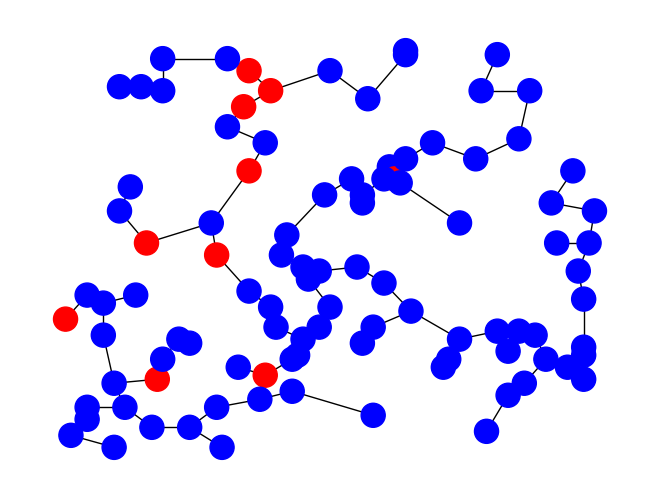

In [448]:
colors_series = colors.color
draw(graph, positions, node_color = colors_series)

In [449]:
def choose_frequent_point(phase):
    frequent_point = choice(phase)
    return frequent_point
choose_frequent_point(frequent_points)

(16, 51)

In [450]:
def compute_direction():
    direction = choice(('departing', 'returning'))
    return direction
compute_direction()

'departing'

In [451]:
def choose_infrequent_point():
    infrequent_point = choice(points)
    return infrequent_point
choose_infrequent_point()

(19, 89)

In [452]:
def compute_frequent_path(frequent_point):
    direction = compute_direction()
    infrequent_point = choose_infrequent_point()
    if direction == 'departing':
        source = frequent_point
        target = infrequent_point
    elif direction == 'returning':
        source = infrequent_point
        target = frequent_point
    path = Series((source, target))
    path.index = 'source', 'target'
    return path
compute_frequent_path(choose_frequent_point(frequent_points))

source    (16, 51)
target    (10, 16)
dtype: object

In [453]:
def compute_phase_paths(phase):
    phase_paths = DataFrame(compute_frequent_path(choose_frequent_point(phase)) for index in tuple(range(500)))
    return phase_paths
compute_phase_paths(frequent_points)

,source,target
0,"(38, 18)","(45, 45)"
1,"(17, 5)","(38, 18)"
2,"(92, 51)","(35, 69)"
3,"(39, 89)","(24, 26)"
4,"(34, 85)","(85, 77)"
...,...,...
495,"(35, 94)","(5, 10)"
496,"(29, 48)","(35, 69)"
497,"(39, 89)","(29, 48)"
498,"(39, 89)","(95, 69)"


In [454]:
frequent_paths_points = concat(tuple(compute_phase_paths(phase) for phase in phases * 2)).reset_index(drop = True)
frequent_paths_points

,source,target
0,"(48, 30)","(19, 89)"
1,"(56, 63)","(77, 72)"
2,"(77, 72)","(97, 37)"
3,"(94, 20)","(35, 39)"
4,"(19, 22)","(40, 30)"
...,...,...
1995,"(64, 98)","(50, 35)"
1996,"(87, 89)","(58, 30)"
1997,"(16, 51)","(78, 89)"
1998,"(41, 48)","(78, 89)"


In [455]:
def compute_index_from_point(point):
    point_index = points[points == point].index.item()
    return point_index
compute_index_from_point(choose_infrequent_point())

31

In [456]:
frequent_paths_indices = frequent_paths_points.applymap(compute_index_from_point)
frequent_paths = concat((frequent_paths_points, frequent_paths_indices), axis = 1)
frequent_paths.columns = 'source_point', 'target_point', 'source_index', 'target_index'
frequent_paths[:6]

,source_point,target_point,source_index,target_index
0,"(48, 30)","(19, 89)",67,95
1,"(56, 63)","(77, 72)",86,0
2,"(77, 72)","(97, 37)",0,23
3,"(94, 20)","(35, 39)",20,5
4,"(19, 22)","(40, 30)",10,44
5,"(60, 67)","(50, 35)",81,43


In [457]:
from operator import ne
def compute_training_paths(testing, operator):
    index = frequent_paths.index
    name = testing.name
    training_paths = frequent_paths[operator(index, name)]
    return training_paths
testing = frequent_paths.loc[6]
operator = ne
compute_training_paths(testing, operator)

,source_point,target_point,source_index,target_index
0,"(48, 30)","(19, 89)",67,95
1,"(56, 63)","(77, 72)",86,0
2,"(77, 72)","(97, 37)",0,23
3,"(94, 20)","(35, 39)",20,5
4,"(19, 22)","(40, 30)",10,44
...,...,...,...,...
1995,"(64, 98)","(50, 35)",62,43
1996,"(87, 89)","(58, 30)",31,60
1997,"(16, 51)","(78, 89)",78,40
1998,"(41, 48)","(78, 89)",72,40


In [458]:
def compute_infrequent_path():
    infrequent_path = Series(choose_infrequent_point() for index in tuple(range(2)))
    infrequent_path.index = 'source', 'target'
    return infrequent_path
compute_infrequent_path()

source     (30, 0)
target    (83, 13)
dtype: object

In [459]:
infrequent_paths = frequent_paths.apply(lambda frequent_path : compute_infrequent_path(), 1)
infrequent_paths

,source,target
0,"(10, 0)","(49, 63)"
1,"(50, 94)","(29, 10)"
2,"(16, 51)","(39, 35)"
3,"(98, 51)","(44, 23)"
4,"(19, 97)","(79, 4)"
...,...,...
1995,"(34, 85)","(19, 22)"
1996,"(43, 14)","(2, 3)"
1997,"(87, 89)","(64, 72)"
1998,"(1, 32)","(58, 8)"


In [460]:
def compute_path_2d(path_before):
    source_x = path_before.source_x
    source_y = path_before.source_y
    source = source_x, source_y
    target_x = path_before.target_x
    target_y = path_before.target_y
    target = target_x, target_y
    path_after = Series((source, target))
    path_after.index = 'source', 'target'
    return path_after

In [461]:
from operator import lt
from itertools import chain
from sklearn.cluster import KMeans
def compute_centers_euclidean(testing):
    training_paths = compute_training_paths(testing, lt)[['source_point', 'target_point']]
    training_paths = training_paths.apply(lambda training_path : Series(chain(* training_path)), 1)
    columns = 'source_x', 'source_y', 'target_x', 'target_y'
    training_paths.columns = columns
    n_clusters = min(len(training_paths), 8)
    k_means = KMeans(n_clusters, n_init = 'auto')
    k_means.fit(training_paths)
    centers = DataFrame(k_means.cluster_centers_)
    centers.columns = columns
    centers = centers.applymap(int).apply(compute_path_2d, 1)
    return centers
compute_centers_euclidean(testing)

,source,target
0,"(19, 22)","(40, 30)"
1,"(56, 63)","(77, 72)"
2,"(94, 20)","(35, 39)"
3,"(48, 30)","(19, 89)"
4,"(77, 72)","(97, 37)"
5,"(60, 67)","(50, 35)"


In [462]:
def compute_path_from_indices(indices):
    point = points[indices]
    point.index = 'source', 'target'
    return point

In [463]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
frequent_paths_indices = frequent_paths[['source_index', 'target_index']]
encoder.fit(frequent_paths_indices)
encoder.categories_

[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])]

In [464]:
frequent_paths_indices = frequent_paths.drop_duplicates()[['source_index', 'target_index']]
frequent_paths_sparse = encoder.transform(frequent_paths_indices)
frequent_paths_sparse

<1438x200 sparse matrix of type '<class 'numpy.float64'>'
	with 2876 stored elements in Compressed Sparse Row format>

In [465]:
from scipy.sparse import find
def compute_training_paths_sparse(testing):
    index = Series(range(frequent_paths_sparse.shape[0]))
    name = testing.name
    training_paths_sparse = frequent_paths_sparse[index < name]
    return training_paths_sparse
training_paths_sparse = DataFrame(find(compute_training_paths_sparse(testing))).transpose()
training_paths_sparse.columns = 'row', 'column', 'value'
training_paths_sparse.applymap(int).sort_values('row')

,row,column,value
3,0,67,1
11,0,195,1
5,1,86,1
6,1,100,1
0,2,0,1
8,2,123,1
2,3,20,1
7,3,105,1
1,4,10,1
10,4,144,1


In [466]:
def compute_centers_categorical(testing):
    training_paths_sparse = compute_training_paths_sparse(testing)
    k_means = KMeans(min(training_paths_sparse.shape[0], 8), n_init = 'auto')
    k_means.fit(training_paths_sparse)
    centers = k_means.cluster_centers_
    centers = DataFrame(encoder.inverse_transform(centers))
    centers.columns = 'source', 'target'
    centers = centers.apply(compute_path_from_indices, 1)
    return centers
compute_centers_categorical(testing)

,source,target
0,"(19, 22)","(40, 30)"
1,"(60, 67)","(50, 35)"
2,"(94, 20)","(35, 39)"
3,"(77, 72)","(97, 37)"
4,"(56, 63)","(77, 72)"
5,"(48, 30)","(19, 89)"


In [467]:
def compute_variant(testing):
    centers = compute_centers_categorical(testing)
    variant = compute_frequent_path(choice(centers.loc[choice(centers.index)]))
    return variant
compute_variant(testing)

source    (49, 63)
target    (94, 20)
dtype: object

In [468]:
variant_paths = frequent_paths[1:].apply(compute_variant, 1)
variant_paths

,source,target
1,"(19, 89)","(8, 36)"
2,"(64, 72)","(19, 89)"
3,"(90, 22)","(48, 30)"
4,"(19, 89)","(77, 72)"
5,"(94, 20)","(1, 32)"
...,...,...
1995,"(45, 45)","(11, 59)"
1996,"(17, 5)","(42, 53)"
1997,"(64, 99)","(78, 89)"
1998,"(97, 25)","(94, 20)"


In [469]:
def compute_training_discovery(testing, operator, discovery):
    training_paths = compute_training_paths(testing, operator)[['source_point', 'target_point']]
    training_paths.columns = 'source', 'target'
    training_index = training_paths.index
    if discovery is None:
        training_discovery = training_paths
    else:
        discovery_index = discovery.index
        training_index = training_index[training_index.isin(discovery_index)]
        visible_discovery = discovery.loc[training_index]
        training_discovery = concat((training_paths, visible_discovery))
    return training_discovery
compute_training_discovery(testing, operator, variant_paths)

,source,target
0,"(48, 30)","(19, 89)"
1,"(56, 63)","(77, 72)"
2,"(77, 72)","(97, 37)"
3,"(94, 20)","(35, 39)"
4,"(19, 22)","(40, 30)"
...,...,...
1995,"(45, 45)","(11, 59)"
1996,"(17, 5)","(42, 53)"
1997,"(64, 99)","(78, 89)"
1998,"(97, 25)","(94, 20)"


In [470]:
from scipy.spatial.distance import cdist
def compute_training_distances(testing, operator, discovery):
    training_paths = compute_training_discovery(testing, operator, discovery)
    testing_tuples = tuple(chain(* testing[['source_point', 'target_point']])),
    training_tuples = tuple(training_paths.apply(lambda training_path : tuple(chain(* training_path)), 1))
    training_distances = Series(cdist(testing_tuples, training_tuples)[0])
    index = training_paths.index
    training_distances.index = index
    training_distances = concat((training_paths, training_distances), axis = 1)
    training_distances.columns = 'source', 'target', 'distance'
    return training_distances
discovery = infrequent_paths
compute_training_distances(testing, operator, discovery)

,source,target,distance
0,"(48, 30)","(19, 89)",102.756995
1,"(56, 63)","(77, 72)",40.828911
2,"(77, 72)","(97, 37)",7.071068
3,"(94, 20)","(35, 39)",82.091412
4,"(19, 22)","(40, 30)",95.895777
...,...,...,...
1995,"(34, 85)","(19, 22)",91.820477
1996,"(43, 14)","(2, 3)",122.625446
1997,"(87, 89)","(64, 72)",46.872167
1998,"(1, 32)","(58, 8)",100.578328


In [471]:
def compute_solution(testing, operator, discovery):
    solution = compute_training_distances(testing, operator, discovery).sort_values('distance').iloc[0]
    return solution
compute_solution(testing, operator, infrequent_paths)

source      (77, 72)
target      (97, 37)
distance    7.071068
Name: 2, dtype: object

In [472]:
def compute_solutions(operator, discovery):
    testing_paths = frequent_paths[1:][['source_point', 'target_point']]
    solutions = testing_paths.apply(lambda testing_path : compute_solution(testing_path, operator, discovery), 1)
    solutions = concat((testing_paths, solutions), axis = 1)
    solutions.columns = ('testing_source', 'testing_target', 'training_source', 'training_target', 'distance')
    return solutions
compute_solutions(operator, discovery)

,testing_source,testing_target,training_source,training_target,distance
1,"(56, 63)","(77, 72)","(56, 63)","(77, 72)",0.000000
2,"(77, 72)","(97, 37)","(77, 72)","(96, 44)",7.071068
3,"(94, 20)","(35, 39)","(97, 25)","(35, 39)",5.830952
4,"(19, 22)","(40, 30)","(19, 22)","(40, 30)",0.000000
5,"(60, 67)","(50, 35)","(60, 67)","(50, 35)",0.000000
...,...,...,...,...,...
1995,"(64, 98)","(50, 35)","(64, 99)","(50, 35)",1.000000
1996,"(87, 89)","(58, 30)","(87, 89)","(58, 30)",0.000000
1997,"(16, 51)","(78, 89)","(16, 51)","(87, 89)",9.000000
1998,"(41, 48)","(78, 89)","(41, 48)","(78, 89)",0.000000


In [473]:
from networkx import shortest_path
def compute_solution_distance(solution):
    training_source = solution.training_source
    testing_source = solution.testing_source
    source_distance = len(shortest_path(graph, training_source, testing_source)) - 1
    training_target = solution.training_target
    testing_target = solution.testing_target
    target_distance = len(shortest_path(graph, training_target, testing_target)) - 1
    solution_distance = source_distance + target_distance
    return solution_distance
solution = compute_solutions(operator, discovery).iloc[1]
compute_solution_distance(solution)

1

In [474]:
def compute_solution_distances(operator, discovery):
    solutions = compute_solutions(operator, discovery)
    solution_distances = solutions.apply(compute_solution_distance, 1)
    solution_distances = concat((solutions, solution_distances), axis = 1)
    solution_distances.columns = ('testing_source', 'testing_target', 'training_source', 'training_target',
                                  'euclidean_distance', 'graph_distance')
    return solution_distances
compute_solution_distances(operator, discovery)

,testing_source,testing_target,training_source,training_target,euclidean_distance,graph_distance
1,"(56, 63)","(77, 72)","(56, 63)","(77, 72)",0.000000,0
2,"(77, 72)","(97, 37)","(77, 72)","(96, 44)",7.071068,1
3,"(94, 20)","(35, 39)","(97, 25)","(35, 39)",5.830952,2
4,"(19, 22)","(40, 30)","(19, 22)","(40, 30)",0.000000,0
5,"(60, 67)","(50, 35)","(60, 67)","(50, 35)",0.000000,0
...,...,...,...,...,...,...
1995,"(64, 98)","(50, 35)","(64, 99)","(50, 35)",1.000000,1
1996,"(87, 89)","(58, 30)","(87, 89)","(58, 30)",0.000000,0
1997,"(16, 51)","(78, 89)","(16, 51)","(87, 89)",9.000000,1
1998,"(41, 48)","(78, 89)","(41, 48)","(78, 89)",0.000000,0


In [475]:
def compute_mean_distances(operator, discovery):
    window = len(frequent_paths) // 10
    solution_distances = compute_solution_distances(operator, discovery).graph_distance.rolling(window).mean()
    solution_distances = solution_distances[solution_distances.notna()]
    return solution_distances
compute_mean_distances(ne, infrequent_paths)

200     0.590
201     0.600
202     0.595
203     0.585
204     0.585
        ...  
1995    0.510
1996    0.510
1997    0.505
1998    0.500
1999    0.505
Name: graph_distance, Length: 1800, dtype: float64

In [476]:
from operator import lt
def compute_operator_distances(discovery):
    operators = ne, lt
    operator_distances = DataFrame(compute_mean_distances(operator, discovery) for operator in operators).transpose()
    names = tuple(operator.__name__ for operator in operators)
    operator_distances.columns = names
    return operator_distances
compute_operator_distances(infrequent_paths)

,ne,lt
200,0.590,6.305
201,0.600,6.135
202,0.595,5.990
203,0.585,5.875
204,0.585,5.795
...,...,...
1995,0.510,0.575
1996,0.510,0.570
1997,0.505,0.565
1998,0.500,0.560


In [477]:
from itertools import product
discovery_distances = (compute_operator_distances(discovery) for discovery in (None, infrequent_paths, variant_paths))
discovery_distances = concat(discovery_distances, axis = 1)
operators = discovery_distances.columns
operators = operators.drop_duplicates()
discoveries = 'none', 'random', 'kmeans'
columns = DataFrame(product(discoveries, operators))
columns.columns = 'operator', 'discovery'
columns_operators = columns.operator
columns_discoveries = columns.discovery
columns = columns_operators + '_' + columns_discoveries
discovery_distances.columns = columns
discovery_distances

,none_ne,none_lt,random_ne,random_lt,kmeans_ne,kmeans_lt
200,0.895,6.995,0.590,6.305,0.380,5.805
201,0.905,6.840,0.600,6.135,0.380,5.650
202,0.900,6.695,0.595,5.990,0.380,5.505
203,0.890,6.580,0.585,5.875,0.375,5.390
204,0.890,6.465,0.585,5.795,0.375,5.275
...,...,...,...,...,...,...
1995,0.745,0.975,0.510,0.575,0.575,0.630
1996,0.745,0.970,0.510,0.570,0.575,0.625
1997,0.735,0.960,0.505,0.565,0.575,0.625
1998,0.730,0.955,0.500,0.560,0.575,0.625


In [478]:
iterations.append(discovery_distances)
len(iterations)

10

In [479]:
iterations_concat = concat(iterations)
index = iterations_concat.index
iterations_mean = iterations_concat.groupby(index).mean()
iterations_mean

,none_ne,none_lt,random_ne,random_lt,kmeans_ne,kmeans_lt
200,0.8030,7.2255,0.5705,5.8950,0.3265,5.6290
201,0.8015,7.0885,0.5710,5.7790,0.3250,5.4885
202,0.8025,6.9845,0.5705,5.6810,0.3260,5.3965
203,0.8020,6.8935,0.5690,5.6305,0.3255,5.3400
204,0.8045,6.8010,0.5725,5.5310,0.3265,5.2690
...,...,...,...,...,...,...
1995,0.8550,0.9580,0.5585,0.6120,0.5750,0.6465
1996,0.8510,0.9530,0.5570,0.6095,0.5715,0.6420
1997,0.8505,0.9525,0.5565,0.6090,0.5720,0.6425
1998,0.8500,0.9520,0.5555,0.6080,0.5715,0.6420


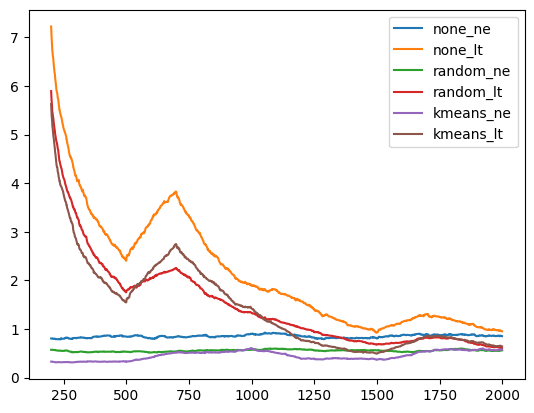

In [480]:
from matplotlib.pyplot import subplots, show
figure, axes = subplots()
columns = iterations_mean.columns
axes.plot(iterations_mean, label = columns)
axes.legend()
show()